In [403]:
import pandas as pd
weather = pd.read_csv("./weatherpred.csv",index_col="DATE")
weather

,STATION,AWND,DAPR,FMTM,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,USW00023230,15.21,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-13,USW00023230,14.54,NaN,NaN,NaN,NaN,0.41,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-14,USW00023230,9.62,NaN,NaN,NaN,1747.0,0.06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
AWND       0.498557
DAPR       0.999547
FMTM       0.876054
MDPR       0.999547
PGTM       0.518196
PRCP       0.016073
SNOW       0.355934
SNWD       0.348916
TAVG       0.884713
TMAX       0.000623
TMIN       0.000792
WDF1       0.669251
WDF2       0.498500
WDF5       0.503537
WDFG       0.758504
WSF1       0.669251
WSF2       0.498444
WSF5       0.503537
WSFG       0.758504
WT01       0.775879
WT02       0.980191
WT03       0.992416
WT04       0.999774
WT05       0.998359
WT07       0.999887
WT08       0.816288
WT09       0.999887
WT16       0.889354
WT18       0.999830
dtype: float64

In [405]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [406]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,49.0,30.0
1960-01-02,0.00,0.0,0.0,49.0,29.0
1960-01-03,0.00,0.0,0.0,54.0,35.0
1960-01-04,0.00,0.0,0.0,54.0,36.0
1960-01-05,0.00,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2024-04-12,0.00,NaN,NaN,62.0,50.0
2024-04-13,0.41,NaN,NaN,58.0,47.0
2024-04-14,0.06,NaN,NaN,60.0,45.0


In [407]:
core_weather.apply(pd.isnull).sum()

precip         284
snow          6289
snow_depth    6165
temp_max        11
temp_min        14
dtype: int64

In [408]:
core_weather["snow"].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [409]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [410]:
del core_weather["snow"]
del core_weather["snow_depth"]

In [411]:
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.00,49.0,30.0
1960-01-02,0.00,49.0,29.0
1960-01-03,0.00,54.0,35.0
1960-01-04,0.00,54.0,36.0
1960-01-05,0.00,55.0,33.0
...,...,...,...
2024-04-12,0.00,62.0,50.0
2024-04-13,0.41,58.0,47.0
2024-04-14,0.06,60.0,45.0


In [412]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


In [413]:
core_weather["precip"].value_counts() / core_weather.shape[0]

precip
0.00    0.811138
0.01    0.025185
0.02    0.011602
0.03    0.007131
0.05    0.005943
          ...   
1.38    0.000057
1.95    0.000057
2.01    0.000057
1.41    0.000057
1.28    0.000057
Name: count, Length: 179, dtype: float64

In [414]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [415]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max    11
temp_min    14
dtype: int64

In [416]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [417]:
core_weather = core_weather.fillna(method="ffill")

/var/folders/5w/j4gn75md2513z6lkbsxp6wv00000gn/T/ipykernel_1735/3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [418]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [419]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [420]:
core_weather.index = pd.to_datetime(core_weather.index)

In [421]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-04-07', '2024-04-08', '2024-04-09', '2024-04-10',
               '2024-04-11', '2024-04-12', '2024-04-13', '2024-04-14',
               '2024-04-15', '2024-04-16'],
              dtype='datetime64[ns]', name='DATE', length=17669, freq=None)

In [422]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=17669)

<Axes: xlabel='DATE'>

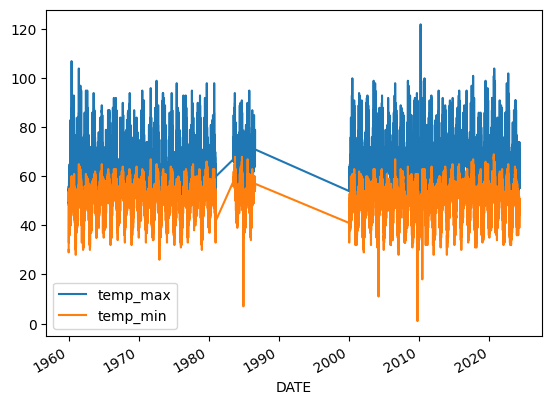

In [423]:
core_weather[["temp_max", "temp_min"]].plot()

In [424]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [425]:
core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    107
Name: count, dtype: int64

<Axes: xlabel='DATE'>

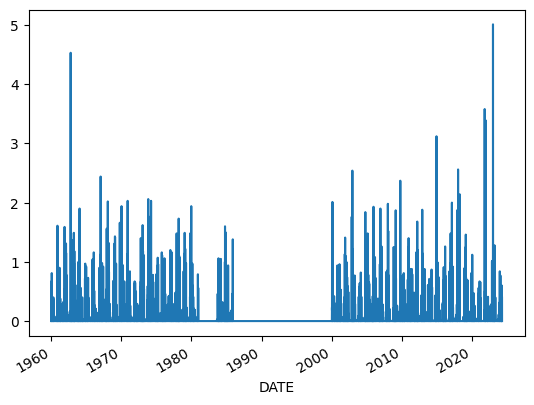

In [426]:
core_weather["precip"].plot()

In [427]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum())

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022    15.38
2023    20.98
2024    11.62
dtype: float64

<Axes: xlabel='DATE'>

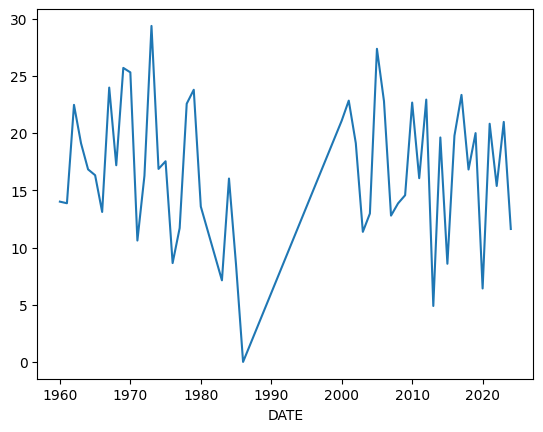

In [428]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [429]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [430]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2024-04-12,0.00,62.0,50.0,58.0
2024-04-13,0.41,58.0,47.0,60.0
2024-04-14,0.06,60.0,45.0,63.0


In [431]:
core_weather = core_weather.iloc[:-1,:].copy()

In [432]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [433]:
predictors = ["precip", "temp_max", "temp_min"]

In [434]:
train = core_weather.loc[:"2022-04-14"]
test = core_weather.loc["2022-04-15":]

In [435]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2024-04-11,0.00,72.0,51.0,62.0
2024-04-12,0.00,62.0,50.0,58.0
2024-04-13,0.41,58.0,47.0,60.0


In [436]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2022-04-10,0.00,68.0,51.0,58.0
2022-04-11,0.08,58.0,47.0,59.0
2022-04-12,0.00,59.0,46.0,59.0


In [437]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2022-04-15,0.00,62.0,48.0,60.0
2022-04-16,0.41,60.0,48.0,59.0
2022-04-17,0.00,59.0,46.0,67.0
2022-04-18,0.00,67.0,43.0,64.0
2022-04-19,0.04,64.0,50.0,67.0
...,...,...,...,...
2024-04-11,0.00,72.0,51.0,62.0
2024-04-12,0.00,62.0,50.0,58.0
2024-04-13,0.41,58.0,47.0,60.0


In [438]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [439]:
predictions = reg.predict(test[predictors])

In [440]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

17.325677332434115

In [441]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [442]:
combined

,actual,predictions
DATE,,
2022-04-15,60.0,62.699126
2022-04-16,59.0,60.358043
2022-04-17,67.0,60.178866
2022-04-18,64.0,65.417287
2022-04-19,67.0,64.410265
...,...,...
2024-04-11,62.0,70.447795
2024-04-12,58.0,63.054872
2024-04-13,60.0,58.737161


<Axes: xlabel='DATE'>

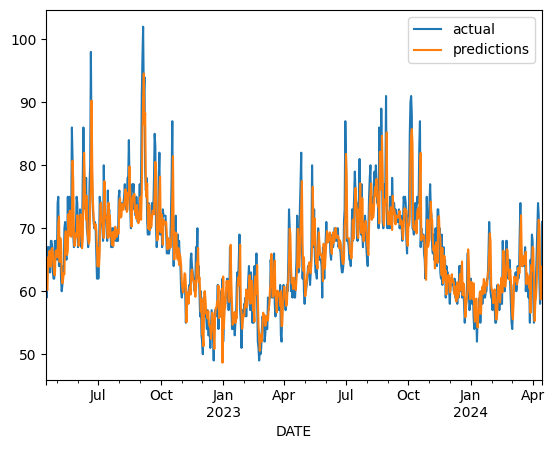

In [443]:
combined.plot()

In [444]:
reg.coef_

array([-2.19042225,  0.72150494,  0.17787291])

In [445]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [446]:
core_weather = core_weather.iloc[30:,:].copy()

In [447]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2022-04-14"]
    test = core_weather.loc["2022-04-15":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [448]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

16.593927038857217

<Axes: xlabel='DATE'>

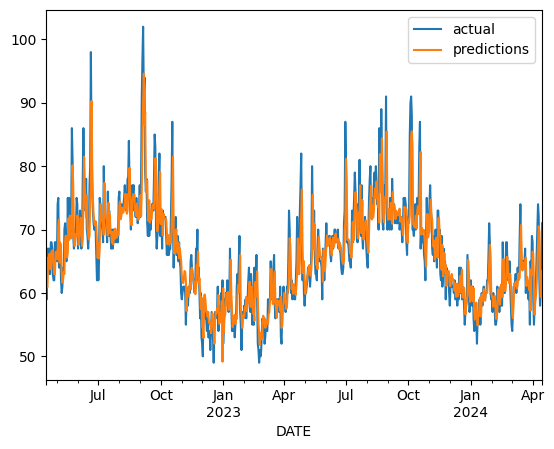

In [449]:
combined.plot()

In [450]:
reg.coef_

array([-1.78632449,  0.83539369,  0.12131427, 13.15869634,  0.14079477])

In [451]:
core_weather.corr()["target"]

precip          -0.205630
temp_max         0.822186
temp_min         0.596320
target           1.000000
month_max        0.688587
month_day_max   -0.420293
max_min          0.044846
Name: target, dtype: float64

In [452]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()
combined["actual_c"]=(combined["actual"]-32)*(5/9)
combined["predictions_c"]=(combined["predictions"]-32)*(5/9)
combined["diff_c"] = (combined["actual_c"] - combined["predictions_c"]).abs()

In [453]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff,actual_c,predictions_c,diff_c
DATE,,,,,,
2022-06-20,98.0,76.688738,21.311262,36.666667,24.827077,11.839590
2022-05-23,86.0,69.410826,16.589174,30.000000,20.783792,9.216208
2023-06-30,87.0,71.145557,15.854443,30.555556,21.747532,8.808024
2023-08-29,91.0,75.358538,15.641462,32.777778,24.088077,8.689701
2023-10-19,67.0,82.244699,15.244699,19.444444,27.913722,8.469277
2023-08-19,86.0,71.108852,14.891148,30.000000,21.727140,8.272860
2022-09-03,91.0,76.228431,14.771569,32.777778,24.571351,8.206427
2023-05-12,80.0,66.429916,13.570084,26.666667,19.127731,7.538935
2023-10-07,70.0,83.339227,13.339227,21.111111,28.521793,7.410682
